Can LLMs improve TTS performance? Small-scale testing with OpenAI LLMs on Whisper outputs.
Please note that due to LLM behaviour the results are not deterministic nor repeatable. 

In [55]:
# ref. on usable models https://platform.openai.com/docs/guides/function-calling
# ref. on pricing https://openai.com/api/pricing/
# gpt-3.5-turbo is by far the cheapest model to use with $2 / million tokens corrected which means a few dollars should make it possible to correct a few thousand lines of text with it

import openai
import json

openai.api_key = os.environ['OPENAI_TOKEN']

client = OpenAI(
  api_key=os.environ['OPENAI_TOKEN'],
)

def correct_sentence(sentence):
    """
    This function takes a single sentence and returns the corrected version using OpenAI's API.
    """
    response = openai.chat.completions.create(
        model="gpt-4o", # please run with as it is 10 times cheaper gpt-3.5-turbo
        messages=[
            {
                "role": "system",
                "content": "You correct grammar and typos in sentences and do nothing else."
            },
            {
                "role": "user",
                "content": f"Correct the following sentence: '{sentence}'"
            }
        ],
        functions=[
            {
                "name": "correct_sentence_function",
                "description": "Correct grammar and typos in the given sentence but change nothing else.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "corrected_sentence": {
                            "type": "string",
                            "description": "The corrected sentence."
                        }
                    },
                    "required": ["corrected_sentence"]
                }
            }
        ],
        function_call="auto"
    )
    try:
        json_string = response.choices[0].message.function_call.arguments
        json_string = json.loads(json_string)
        sentence = json_string["corrected_sentence"]
        return sentence
    except:
        return "error"


sentences_to_correct = [
    "this is a test senntence with an eror.",
    "openai is greaet for NPL.",
    "Pythun is aparse from language."
]

for sentence in sentences_to_correct:
    print(correct_sentence(sentence))


This is a test sentence with an error.
OpenAI is great for NLP.
Python is a parse-from language.


Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/de_de/whisper_transcription_de_de_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/de_de/whisper_only_text_pairs.json
de_de-large-v2-only: 3.75%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/de_de/gpt_corrected_text_pairs.json
de_de-large-v2-gpt-corrected: 6.40%
Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/en_us/whisper_transcription_en_us_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/en_us/whisper_only_text_pairs.json
en_us-large-v2-only: 5.87%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/en_us/gpt_corrected_text_pairs.json
en_us-large-v2-gpt-corrected: 8.05%
Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/fr_fr/whisper_transcription_fr_fr_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/fr_fr/whisper_only_text_pairs.json
fr_fr-large-v2-only: 6.55%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/fr_fr/gpt_corrected_text_pairs.json
fr_fr-large-v2-gpt-corrected: 8.55%
Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/gl_es/whisper_transcription_gl_es_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/gl_es/whisper_only_text_pairs.json
gl_es-large-v2-only: 34.54%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/gl_es/gpt_corrected_text_pairs.json
gl_es-large-v2-gpt-corrected: 47.80%
Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/hr_hr/whisper_transcription_hr_hr_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hr_hr/whisper_only_text_pairs.json
hr_hr-large-v2-only: 12.67%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hr_hr/gpt_corrected_text_pairs.json
hr_hr-large-v2-gpt-corrected: 14.19%
Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/hu_hu/whisper_transcription_hu_hu_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hu_hu/whisper_only_text_pairs.json
hu_hu-large-v2-only: 18.02%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hu_hu/gpt_corrected_text_pairs.json
hu_hu-large-v2-gpt-corrected: 18.59%
Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/it_it/whisper_transcription_it_it_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/it_it/whisper_only_text_pairs.json
it_it-large-v2-only: 2.21%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/it_it/gpt_corrected_text_pairs.json
it_it-large-v2-gpt-corrected: 2.52%
Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/pl_pl/whisper_transcription_pl_pl_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/pl_pl/whisper_only_text_pairs.json
pl_pl-large-v2-only: 6.10%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/pl_pl/gpt_corrected_text_pairs.json
pl_pl-large-v2-gpt-corrected: 7.05%

In [54]:
# calculate wer for gpt-3.5-turbo assisted Whisper outputs

import json
from jiwer import wer
import os
import re

def traverse_fleurs(skip_Hungarian=False):
    # done; see above "de_de", "en_us", "fr_fr", "gl_es"
    fleurs_dataset_dirs = ["hr_hr", "hu_hu", "it_it", "pl_pl"] # "be_by", "ru_ru", "uk_ua"

    for subdir_string in fleurs_dataset_dirs:
        if skip_Hungarian and subdir_string == "hu_hu":
            continue

        subdir = os.path.join("/home/kozi/Documents/_onlab_git/output/fleurs/", subdir_string)
        #print(subdir)
        for file in os.listdir(subdir):
            #print(file)
            if file.startswith("whisper") and file.endswith(".json") and "large-v2" in file:
                file = os.path.join(subdir, file)
                print("Evaluating {}".format(file))

                # calculating WER for the first 100 whisper-only sample
                json_lines = read_json_file(file)
                whisper_only_text_pairs = first_100_text_pairs(json_lines)
                save_corrected_text_pairs(whisper_only_text_pairs, subdir, "whisper_only_text_pairs")
                json_lines = read_json_file(os.path.join(subdir, "whisper_only_text_pairs.json"))
                average_wer_percentage = calculate_weighted_average_wer(json_lines)
                print(f"{subdir_string}-large-v2-only: {average_wer_percentage:.2f}%")

                # requesting gpt-correction for the first 100 sample
                json_lines = read_json_file(file)
                corrected_text_pairs = request_correction_for_lines(json_lines)
                save_corrected_text_pairs(corrected_text_pairs, subdir, "gpt_corrected_text_pairs")
                json_lines = read_json_file(os.path.join(subdir, "gpt_corrected_text_pairs.json"))
                average_wer_percentage = calculate_weighted_average_wer(json_lines)
                print(f"{subdir_string}-large-v2-gpt-corrected: {average_wer_percentage:.2f}%")

def save_corrected_text_pairs(corrected_text_pairs, subdir, filename):
    with open("{}/{}.json".format(subdir, filename), "w") as fout:
        for text_pair in corrected_text_pairs:
            # ensure_ascii=True is the default and even speech_transcribe will use escaped umlauts, but this way the manifest is human-readable
            fout.write(json.dumps(text_pair, ensure_ascii=False) + "\n")
        print("Wrote: {}/{}.json".format(subdir, filename))

def request_correction_for_lines(json_lines):
    gpt_assisted_text_pairs = []
    for index, line in enumerate(json_lines):
        if(index > 100):
            break
        data = json.loads(line)
        text_to_correct = data["pred_text"]
        reference_text = data["text"]
        corrected_text = correct_sentence(text_to_correct)
        gpt_assisted_text_pairs.append({
            "text": reference_text,
            "pred_text": corrected_text
        })
    return gpt_assisted_text_pairs

def first_100_text_pairs(json_lines):
    first_100_text_pairs = []
    for index, line in enumerate(json_lines):
        if(index > 100):
            break
        data = json.loads(line)
        text_to_correct = data["pred_text"]
        reference_text = data["text"]
        first_100_text_pairs.append({
            "text": reference_text,
            "pred_text": text_to_correct
        })
    return first_100_text_pairs

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove all non-alphabetic characters and extra spaces
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def calculate_weighted_average_wer(json_lines):
    total_wer = 0.0
    total_words = 0
    wer_list = []

    for line in json_lines:
        # Parse JSON line
        data = json.loads(line)

        # Text and predicted text
        reference = preprocess_text(data["text"])
        hypothesis = preprocess_text(data["pred_text"])

        if reference == "error" or hypothesis == "error":
            continue

        # Calculate WER for this line
        rate = wer(reference, hypothesis)

        # Number of words in the reference text (weight)
        num_words = len(reference.split())

        # Add the weighted contribution to total WER
        total_wer += rate * num_words
        total_words += num_words

    # Calculate the weighted average WER
    if total_words > 0:
        average_wer = total_wer / total_words
    else:
        average_wer = 0.0

    return average_wer * 100

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

traverse_fleurs()

Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/hr_hr/whisper_transcription_hr_hr_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hr_hr/whisper_only_text_pairs.json
hr_hr-large-v2-only: 12.67%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hr_hr/gpt_corrected_text_pairs.json
hr_hr-large-v2-gpt-corrected: 14.19%
Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/hu_hu/whisper_transcription_hu_hu_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hu_hu/whisper_only_text_pairs.json
hu_hu-large-v2-only: 18.02%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hu_hu/gpt_corrected_text_pairs.json
hu_hu-large-v2-gpt-corrected: 18.59%
Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/it_it/whisper_transcription_it_it_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/it_it/whisper_only_text_pairs.json
it_it-large-v2-only: 2.21%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/it_it/gpt_corrected_text_pairs.js

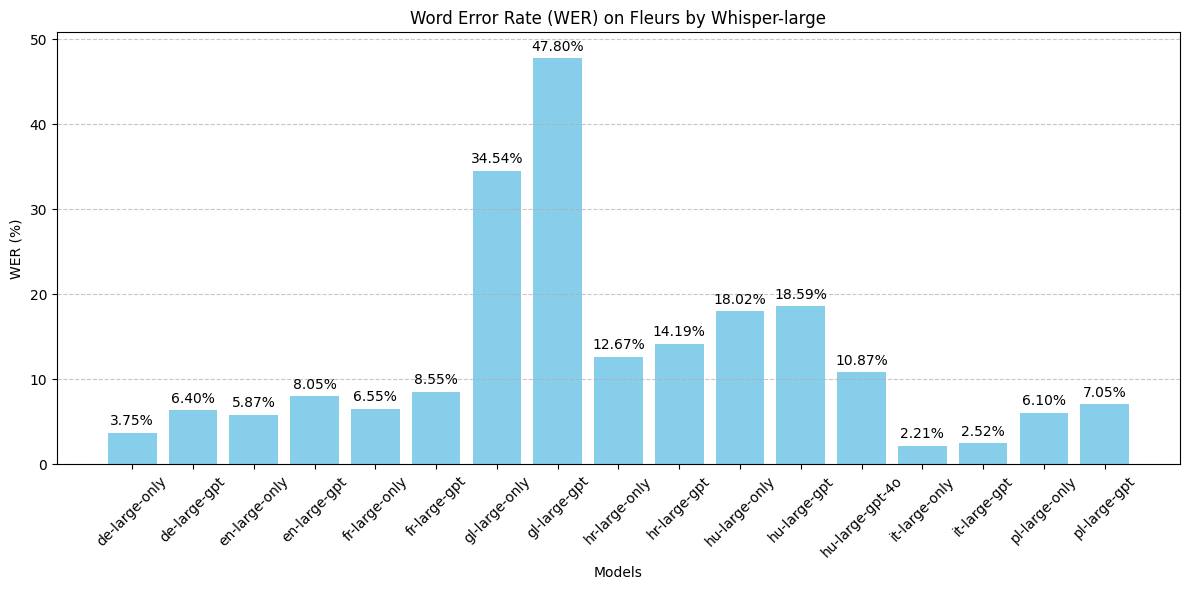

In [59]:
import matplotlib.pyplot as plt

# WER results to visualize
wer_results =  {
    "de-large-only": 3.75,
    "de-large-gpt": 6.40,
    "en-large-only": 5.87,
    "en-large-gpt": 8.05,
    "fr-large-only": 6.55,
    "fr-large-gpt": 8.55,
    "gl-large-only": 34.54,
    "gl-large-gpt": 47.80,
    "hr-large-only": 12.67,
    "hr-large-gpt": 14.19,
    "hu-large-only": 18.02,
    "hu-large-gpt": 18.59,
    "hu-large-gpt-4o": 10.87,
    "it-large-only": 2.21,
    "it-large-gpt": 2.52,
    "pl-large-only": 6.10,
    "pl-large-gpt": 7.05,
}

labels = list(wer_results.keys())
wer_percentages = list(wer_results.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, wer_percentages, color='skyblue')
plt.xlabel('Models')
plt.ylabel('WER (%)')
plt.title('Word Error Rate (WER) on Fleurs by Whisper-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(wer_percentages) + 3)

for i, wer in enumerate(wer_percentages):
    plt.text(i, wer + 0.5, f'{wer:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [56]:
# calculate wer for gpt-4o assisted Whisper outputs on Fleurs hu_hu only

import json
from jiwer import wer
import os
import re

def traverse_fleurs(skip_Hungarian=False):
    fleurs_dataset_dirs = ["hu_hu"]

    for subdir_string in fleurs_dataset_dirs:
        if skip_Hungarian and subdir_string == "hu_hu":
            continue

        subdir = os.path.join("/home/kozi/Documents/_onlab_git/output/fleurs/", subdir_string)
        #print(subdir)
        for file in os.listdir(subdir):
            #print(file)
            if file.startswith("whisper") and file.endswith(".json") and "large-v2" in file:
                file = os.path.join(subdir, file)
                print("Evaluating {}".format(file))

                # calculating WER for the first 100 whisper-only sample
                json_lines = read_json_file(file)
                whisper_only_text_pairs = first_100_text_pairs(json_lines)
                save_corrected_text_pairs(whisper_only_text_pairs, subdir, "whisper_only_text_pairs")
                json_lines = read_json_file(os.path.join(subdir, "whisper_only_text_pairs.json"))
                average_wer_percentage = calculate_weighted_average_wer(json_lines)
                print(f"{subdir_string}-large-v2-only: {average_wer_percentage:.2f}%")

                # requesting gpt-correction for the first 100 sample
                json_lines = read_json_file(file)
                corrected_text_pairs = request_correction_for_lines(json_lines)
                save_corrected_text_pairs(corrected_text_pairs, subdir, "gpt_4o_corrected_text_pairs")
                json_lines = read_json_file(os.path.join(subdir, "gpt_4o_corrected_text_pairs.json"))
                average_wer_percentage = calculate_weighted_average_wer(json_lines)
                print(f"{subdir_string}-large-v2-gpt-4o-corrected: {average_wer_percentage:.2f}%")

def save_corrected_text_pairs(corrected_text_pairs, subdir, filename):
    with open("{}/{}.json".format(subdir, filename), "w") as fout:
        for text_pair in corrected_text_pairs:
            # ensure_ascii=True is the default and even speech_transcribe will use escaped umlauts, but this way the manifest is human-readable
            fout.write(json.dumps(text_pair, ensure_ascii=False) + "\n")
        print("Wrote: {}/{}.json".format(subdir, filename))

def request_correction_for_lines(json_lines):
    gpt_assisted_text_pairs = []
    for index, line in enumerate(json_lines):
        if(index > 100):
            break
        data = json.loads(line)
        text_to_correct = data["pred_text"]
        reference_text = data["text"]
        corrected_text = correct_sentence(text_to_correct)
        gpt_assisted_text_pairs.append({
            "text": reference_text,
            "pred_text": corrected_text
        })
    return gpt_assisted_text_pairs

def first_100_text_pairs(json_lines):
    first_100_text_pairs = []
    for index, line in enumerate(json_lines):
        if(index > 100):
            break
        data = json.loads(line)
        text_to_correct = data["pred_text"]
        reference_text = data["text"]
        first_100_text_pairs.append({
            "text": reference_text,
            "pred_text": text_to_correct
        })
    return first_100_text_pairs

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove all non-alphabetic characters and extra spaces
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def calculate_weighted_average_wer(json_lines):
    total_wer = 0.0
    total_words = 0
    wer_list = []

    for line in json_lines:
        # Parse JSON line
        data = json.loads(line)

        # Text and predicted text
        reference = preprocess_text(data["text"])
        hypothesis = preprocess_text(data["pred_text"])

        if reference == "error" or hypothesis == "error":
            continue

        # Calculate WER for this line
        rate = wer(reference, hypothesis)

        # Number of words in the reference text (weight)
        num_words = len(reference.split())

        # Add the weighted contribution to total WER
        total_wer += rate * num_words
        total_words += num_words

    # Calculate the weighted average WER
    if total_words > 0:
        average_wer = total_wer / total_words
    else:
        average_wer = 0.0

    return average_wer * 100

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

traverse_fleurs()

Evaluating /home/kozi/Documents/_onlab_git/output/fleurs/hu_hu/whisper_transcription_hu_hu_large-v2.json
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hu_hu/whisper_only_text_pairs.json
hu_hu-large-v2-only: 18.02%
Wrote: /home/kozi/Documents/_onlab_git/output/fleurs/hu_hu/gpt_4o_corrected_text_pairs.json
hu_hu-large-v2-gpt-4o-corrected: 10.87%
